In [1]:
import matplotlib.pyplot as plt
import pandas as pd
from collections import Counter 
import numpy as np


In [3]:
data=pd.read_csv("Transform_data.csv",dtype=str)

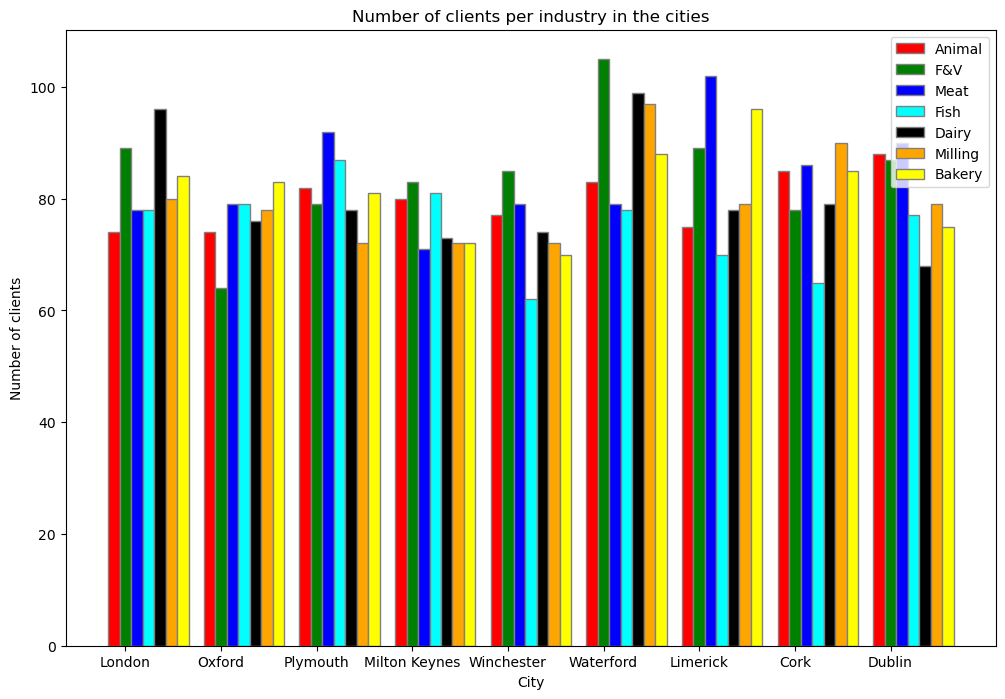

In [7]:
barWidth = 0.12
fig,ax = plt.subplots(figsize =(12, 8))
unique_cities=list(set(data['city']))
classify=[]
graph=[]
big_graph=[]
#Modifying the data to put correctly in the commands of plot
for i in range(len(unique_cities)):
    classify.append(data.loc[data['city'] == unique_cities[i]])#Put in a list a df filtered with each city
for i in range(len(classify)): 
    for j in range(len(classify[i])):#Here we are changing the data to count the clients per industry in each index of the previous list
        graph.append(classify[i]['original_industry'].iloc[j].split(';'))
    big_graph.append( list(j for i in graph for j in i))
    big_graph[i]=list(filter(('').__ne__, big_graph[i]))
    big_graph[i]=Counter(big_graph[i])
    graph=[]
values=[]
for i in range(len(big_graph)):#Values has only the number of clients 
    values.append(list(big_graph[i].values()))
values.remove([])
values=np.transpose(values)#Adapt the matrix to put it in the plt.bar
#Use the function of plt bar to plot
br1 = np.arange(len(values[0]))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]
br5 = [x + barWidth for x in br4]
br6 = [x + barWidth for x in br5]
br7 = [x + barWidth for x in br6]

# Make the plot
plt.bar(br1, values[0], color ='r', width = barWidth,
        edgecolor ='grey', label ='Animal')
plt.bar(br2, values[1], color ='g', width = barWidth,
        edgecolor ='grey', label ='F&V')
plt.bar(br3, values[2], color ='b', width = barWidth,
        edgecolor ='grey', label ='Meat')
plt.bar(br4, values[3], color ='cyan', width = barWidth,
        edgecolor ='grey', label ='Fish')
plt.bar(br5, values[4], color ='black', width = barWidth,
        edgecolor ='grey', label ='Dairy')
plt.bar(br6, values[5], color ='orange', width = barWidth,
        edgecolor ='grey', label ='Milling')
plt.bar(br7, values[6], color ='yellow', width = barWidth,
        edgecolor ='grey', label ='Bakery')
cleanedList = [x for x in unique_cities if x == x]
plt.xticks([r + barWidth for r in range(len(values[0]))],
        cleanedList)
plt.title("Number of clients per industry in the cities")
plt.xlabel("City")
plt.ylabel("Number of clients")
plt.legend(loc='upper right')
plt.show()
#I think this one could be important because it says in each city which is the biggest and smallest indystry 

Text(0, 0.5, 'Clients')

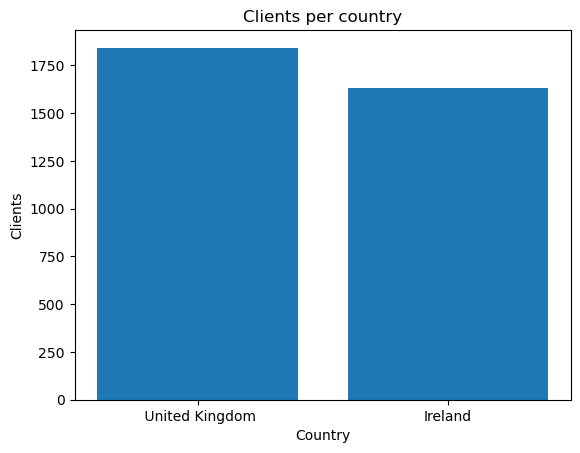

In [8]:
data.loc[data['country'] == 'England' , 'country'] = ' United Kingdom' #England is from United Kingdom so I change the country
graph=data.pivot_table(columns=['country'], aggfunc='size')
fig1, ax1 = plt.subplots()
ax1.bar(graph.index, graph)
plt.title("Clients per country")
plt.xlabel("Country")
plt.ylabel("Clients")
#We can see here that all of our clients are in UK or Ireland, when the number of clients take off we can see if we have clients in another country

Text(0, 0.5, 'Clients')

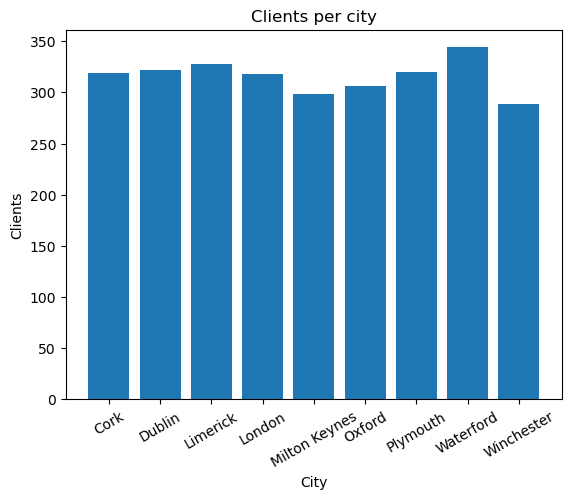

In [9]:
fig2, ax2 = plt.subplots()
graph=data.pivot_table(columns=['city'], aggfunc='size')
ax2.bar(graph.index, graph)
plt.xticks(rotation=30)
plt.title("Clients per city")
plt.xlabel("City")
plt.ylabel("Clients")
#We can see also the cities to know which is the city with more clients or the city with less clients

Text(0, 0.5, 'Number of clients')

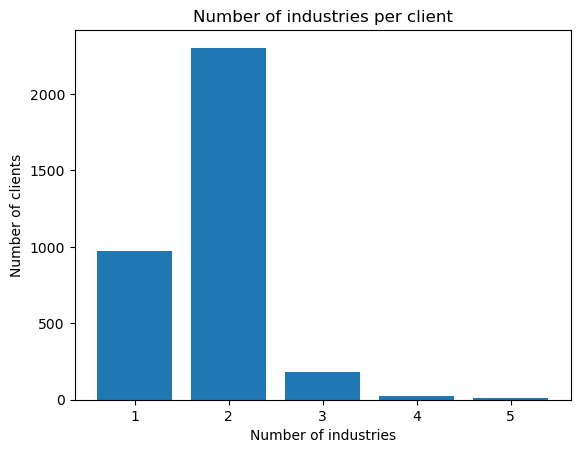

In [10]:
data['#ind']=''
data['#ind']=data['original_industry'].apply(lambda x: x.count(';'))
fig3, ax3 = plt.subplots()
graph=data.pivot_table(columns=['#ind'], aggfunc='size')
ax3.bar(graph.index, graph)
plt.title("Number of industries per client")
plt.xlabel("Number of industries")
plt.ylabel("Number of clients")
#Here we can see how many of industries our clients have. It could help with more graphics like that, I guess for example 
#if today we have 100 clients with 2 industries and 50 clients with 1 industry, and then in a future we have 50 clients with 2 industries and 100 with 1 industry it could be that some clients are losing money or something like that
#Is not totally true but the graphic could support other hipotesis  

Text(0, 0.5, 'Clients')

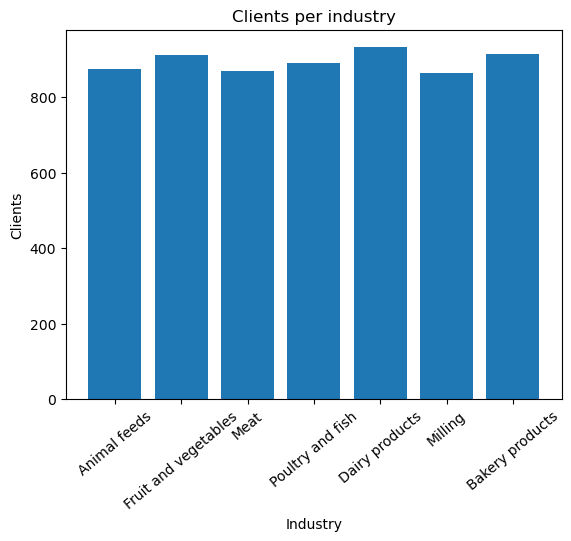

In [11]:
graph=[]
for i in range(len(data['original_industry'])):
    graph.append(data['original_industry'][i].split(';'))
graph = list(j for i in graph for j in i)
graph=list(filter(('').__ne__, graph))
graph=Counter(graph)
fig4, ax4 = plt.subplots()
ax4.bar(list(graph.keys()), list(graph.values()))
plt.xticks(rotation=40)
plt.title("Clients per industry")
plt.xlabel("Industry")
plt.ylabel("Clients")
#Here we can see how many of clients has a certain industry, it is important to see which industry is bigger in our company and also the industry that less we have